# Crop Recommendation Engine

We will be using a crop recommendation dataset to build a Machine Learning model which would help to identify ideal crop to be grown given different soil conditions like the Nitrogen,Phosphorous,Potasium and Ph levels content in the soil and other enviromental factors such as tempreture, humidity and rainfall.

In [106]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification
from keras import models

In [15]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [16]:
df = pd.read_csv("crop_recommendation.csv")

In [17]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### The corr() method finds the correlation of each column in a DataFrame.

In [19]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [92]:
count_dups = df.duplicated().sum()
print("Number of Duplicates: ", count_dups)
if count_dups >= 1:
    df.drop_duplicates(inplace=True)
    print('Duplicate values removed!')
else:
    print('No Duplicate values')

Number of Duplicates:  0
No Duplicate values


## Data Visualisation

We are comparing various factors and the levels with the Crops which would give us an insight into the data.

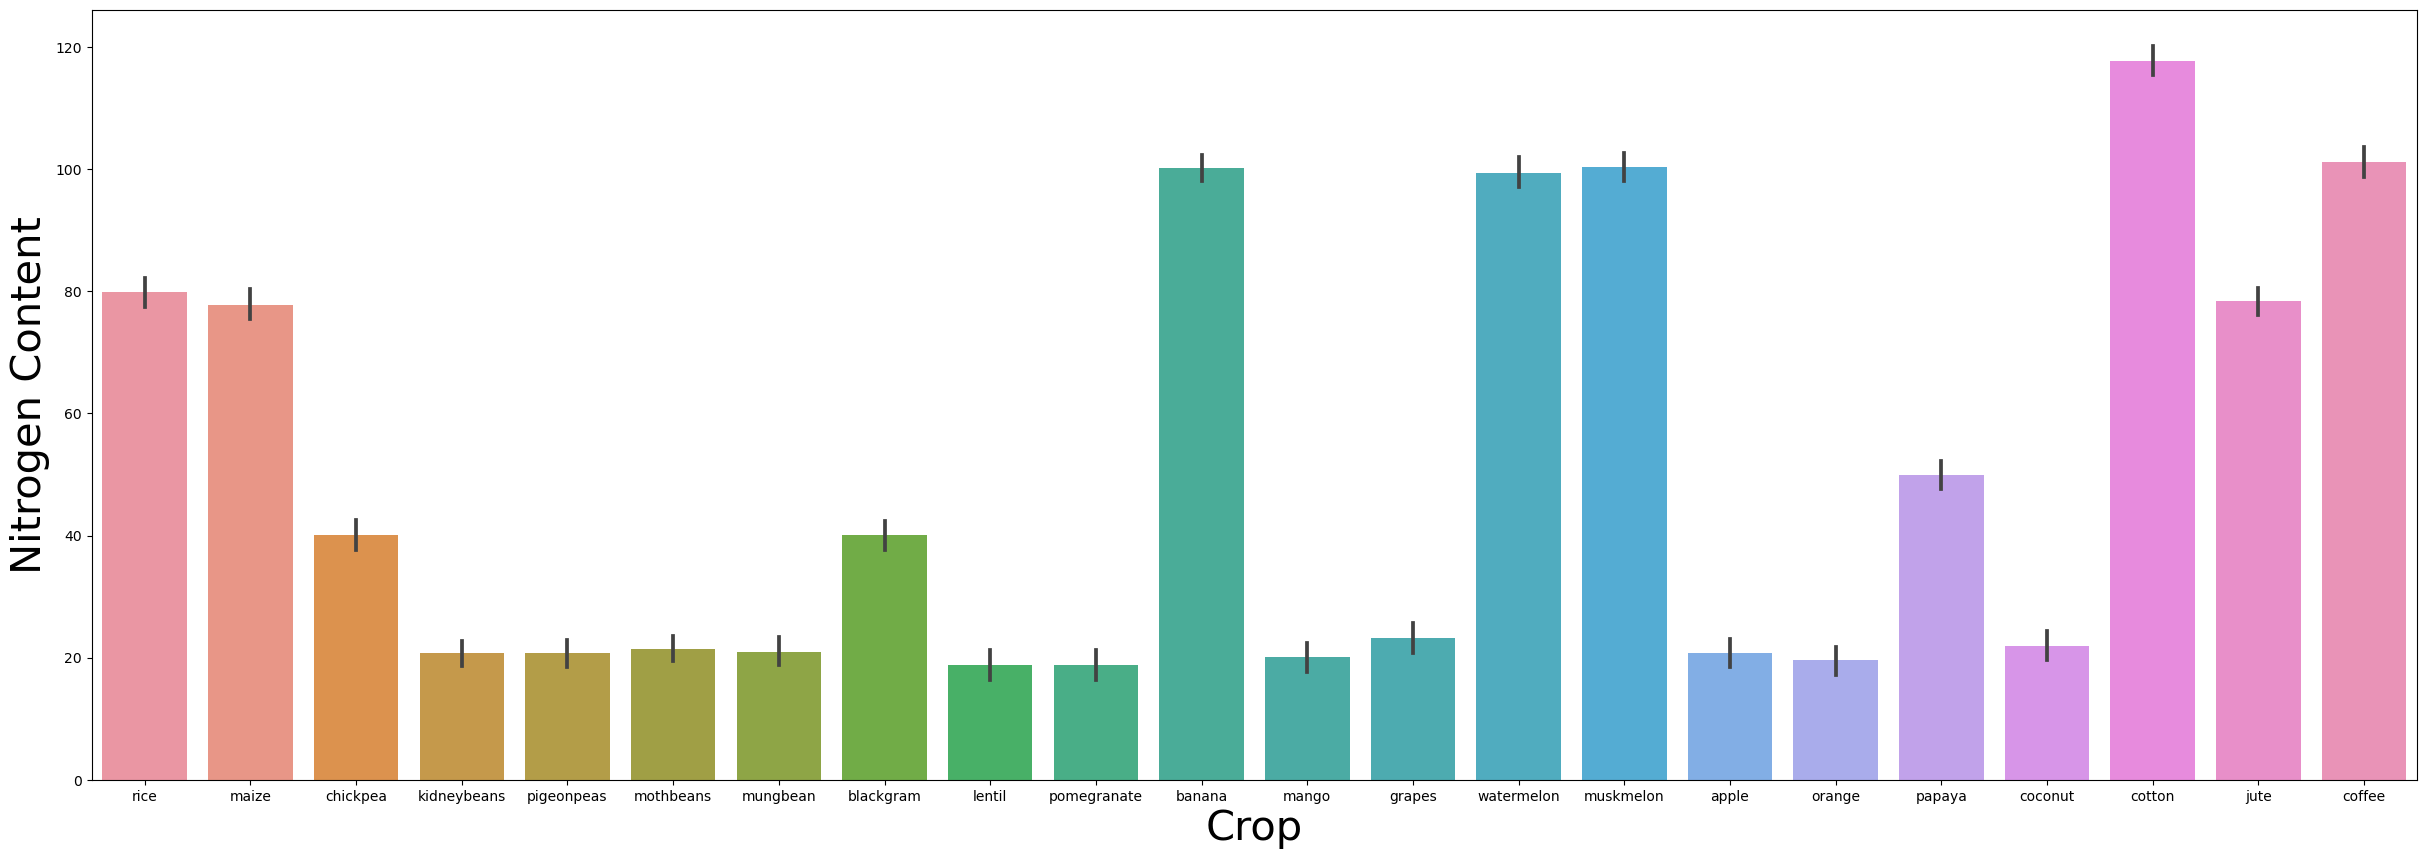

In [20]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x="label",y="N")
plt.xlabel("Crop",fontsize=30)
plt.ylabel("Nitrogen Content",fontsize=30)
plt.show()

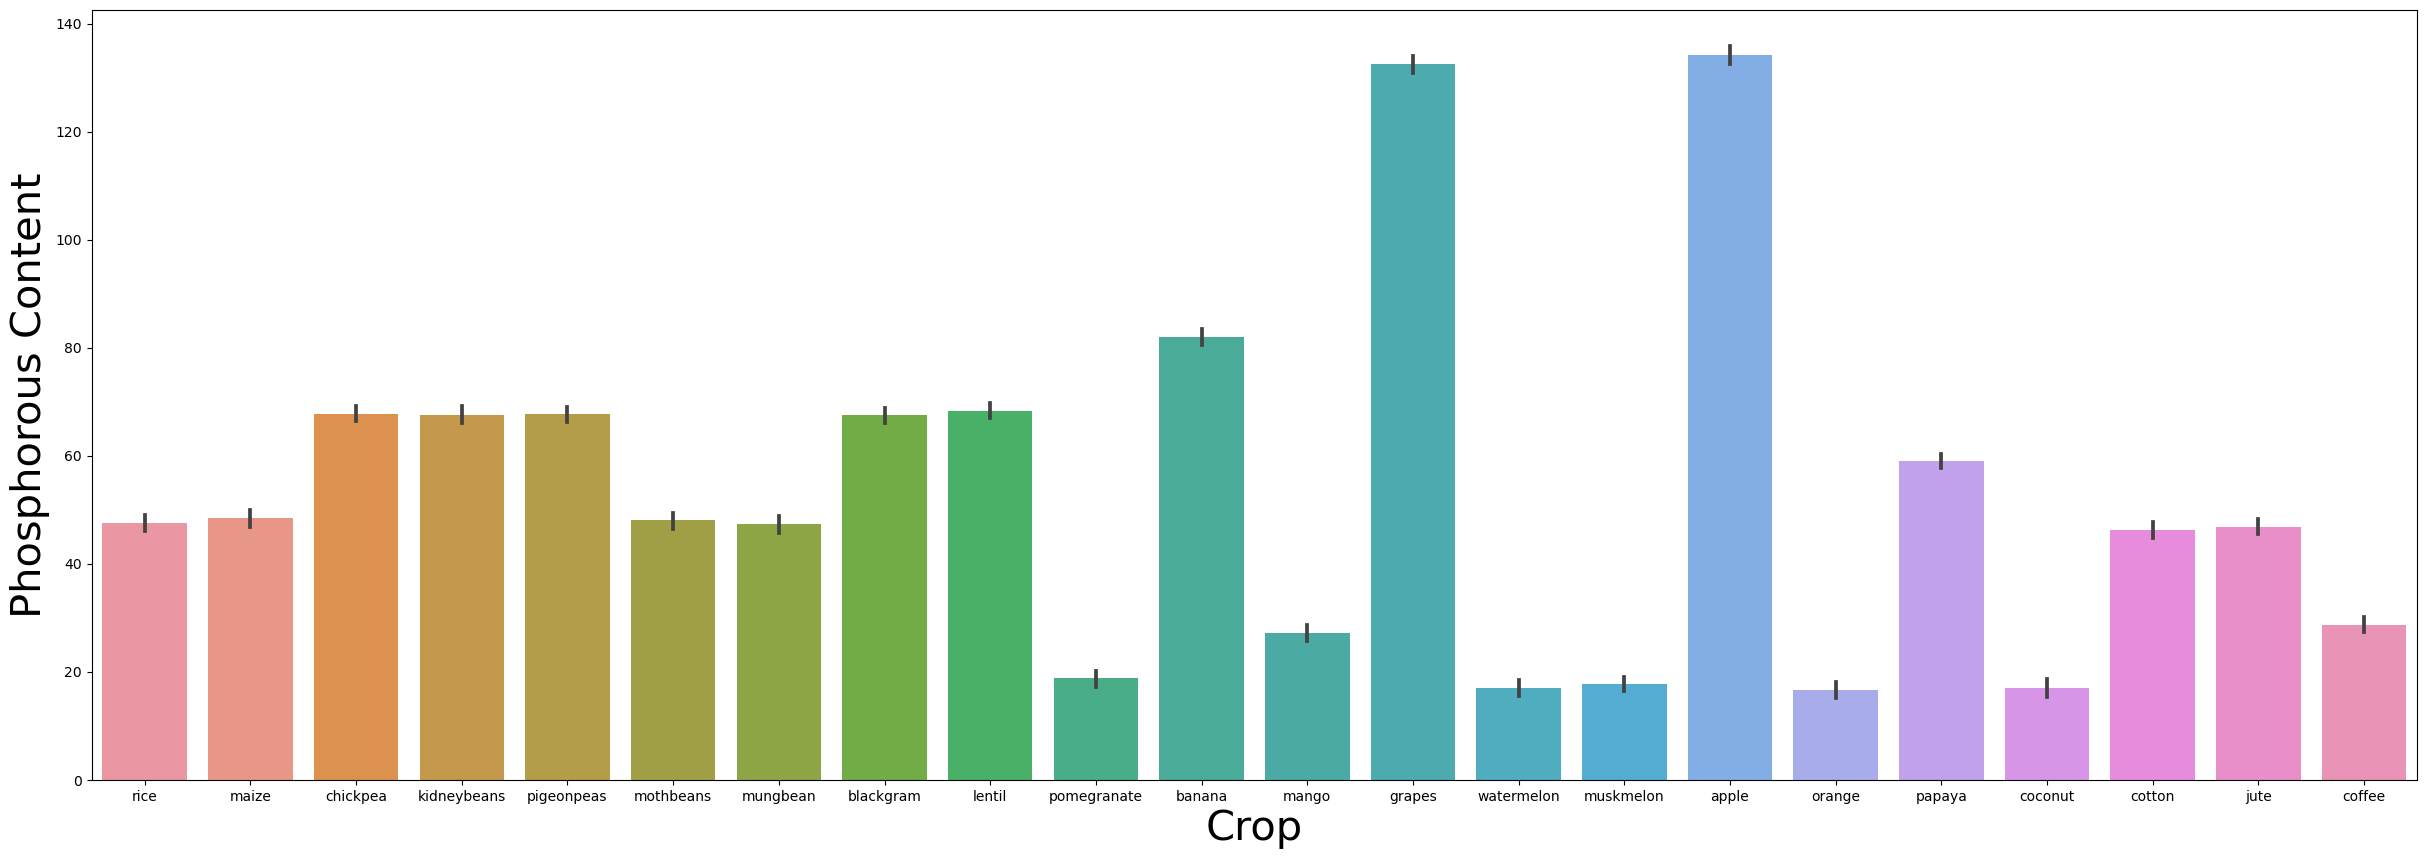

In [21]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x="label",y="P")
plt.xlabel("Crop",fontsize=30)
plt.ylabel("Phosphorous Content",fontsize=30)
plt.show()

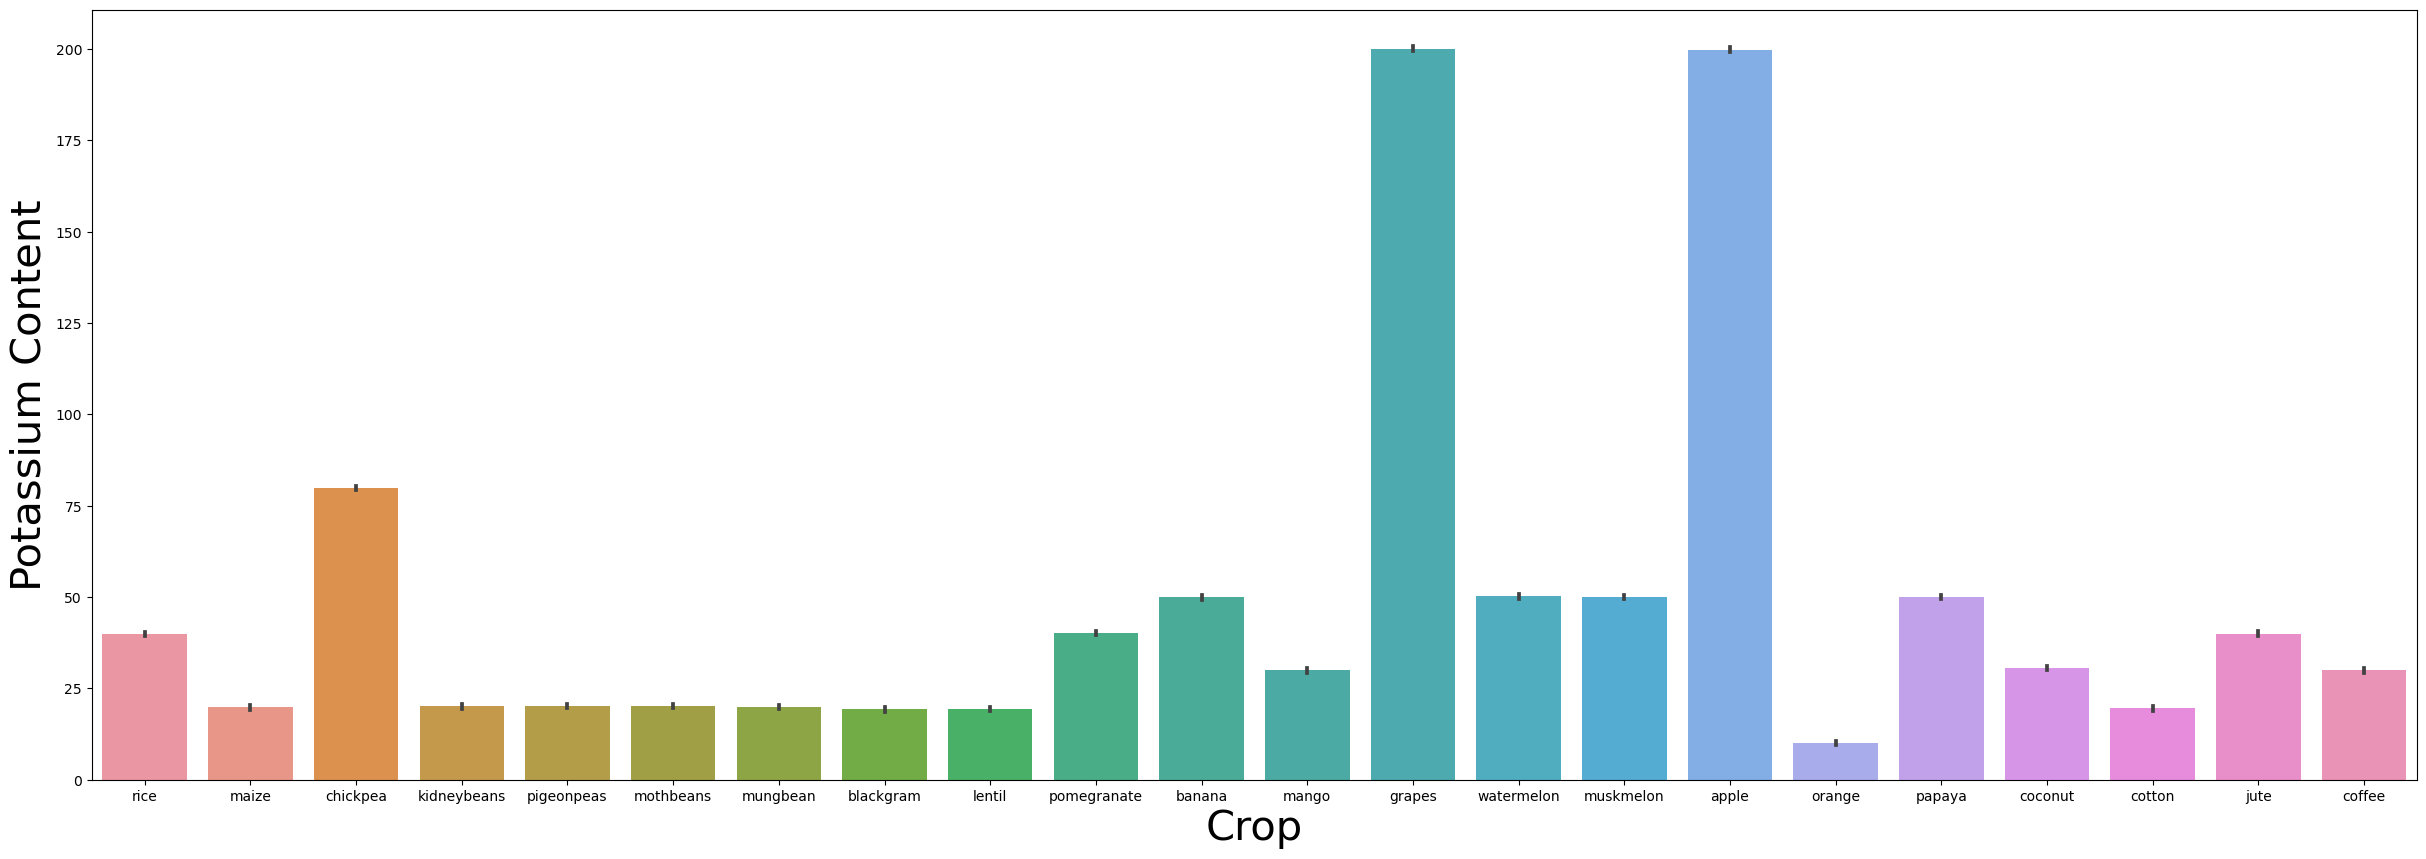

In [22]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x="label",y="K")
plt.xlabel("Crop",fontsize=30)
plt.ylabel("Potassium Content",fontsize=30)
plt.show()

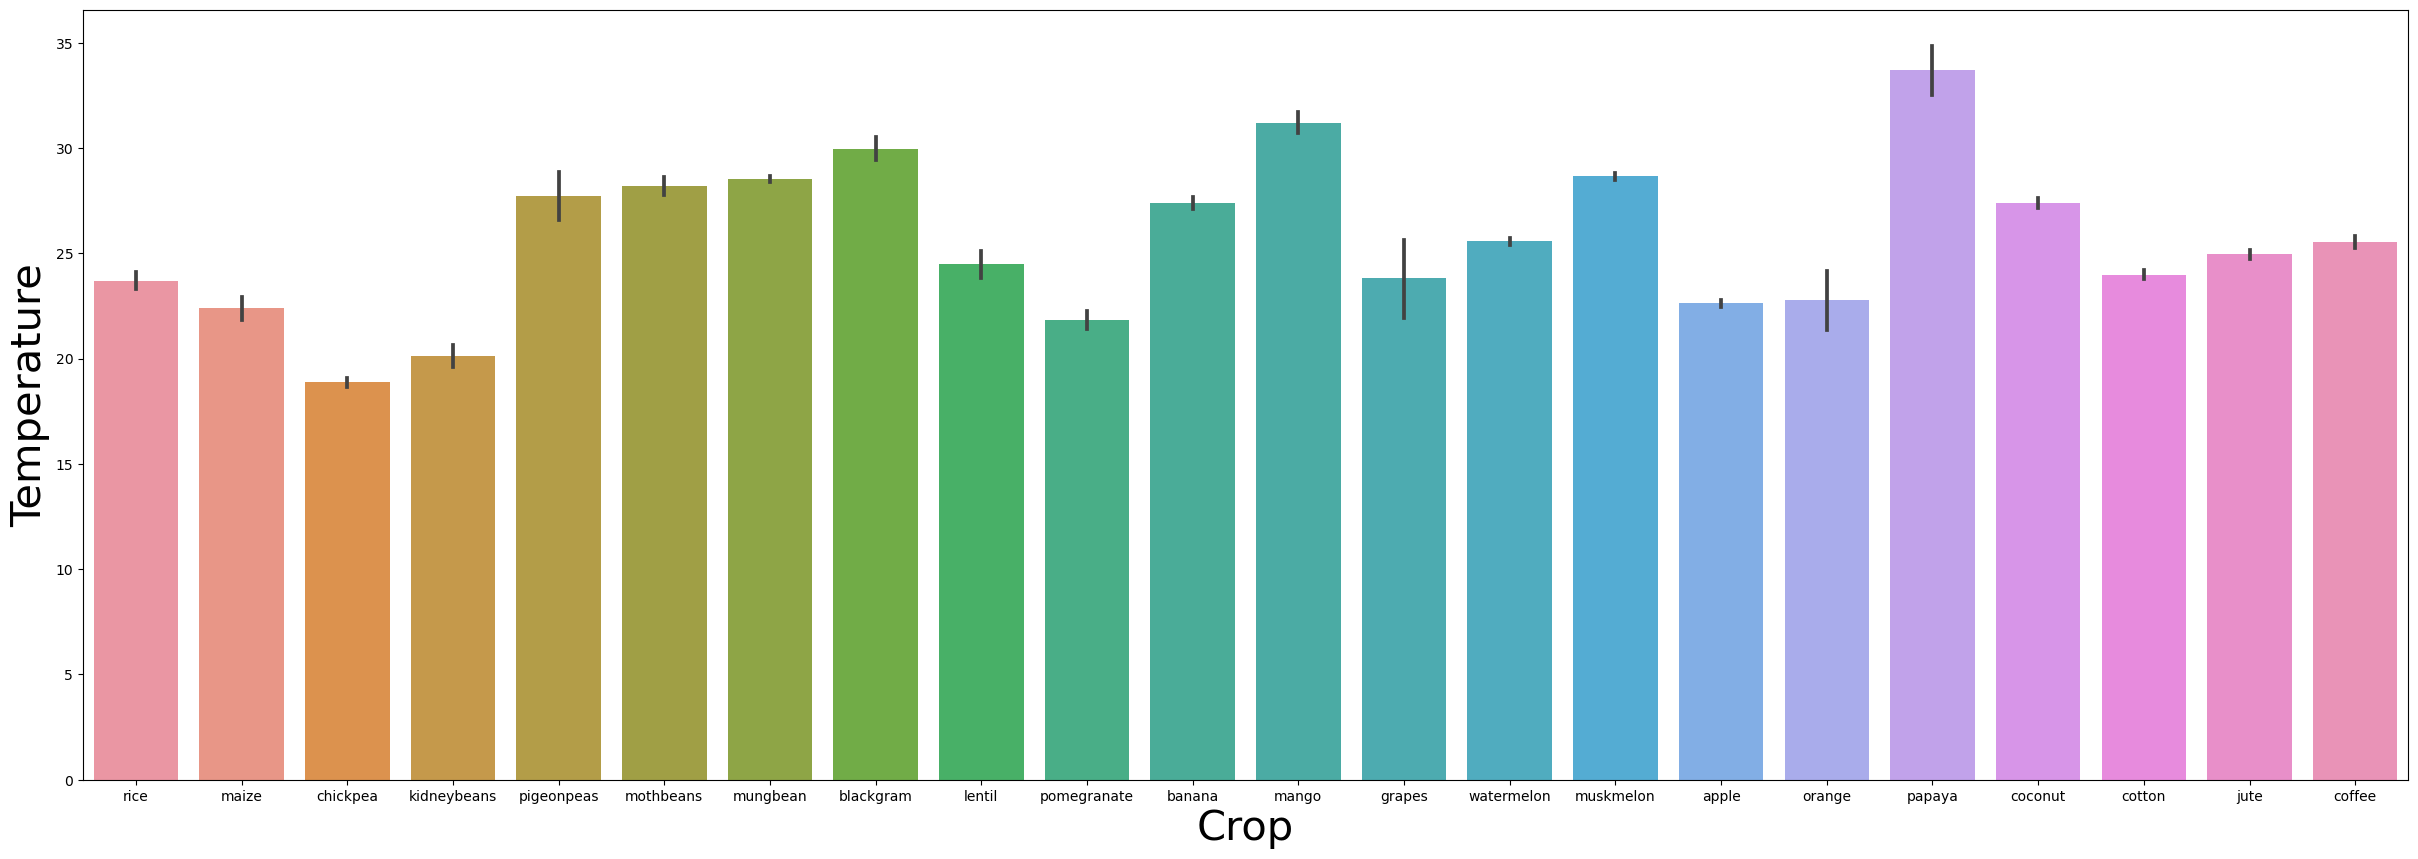

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x="label",y="temperature")
plt.xlabel("Crop",fontsize=30)
plt.ylabel("Temperature",fontsize=30)
plt.show()

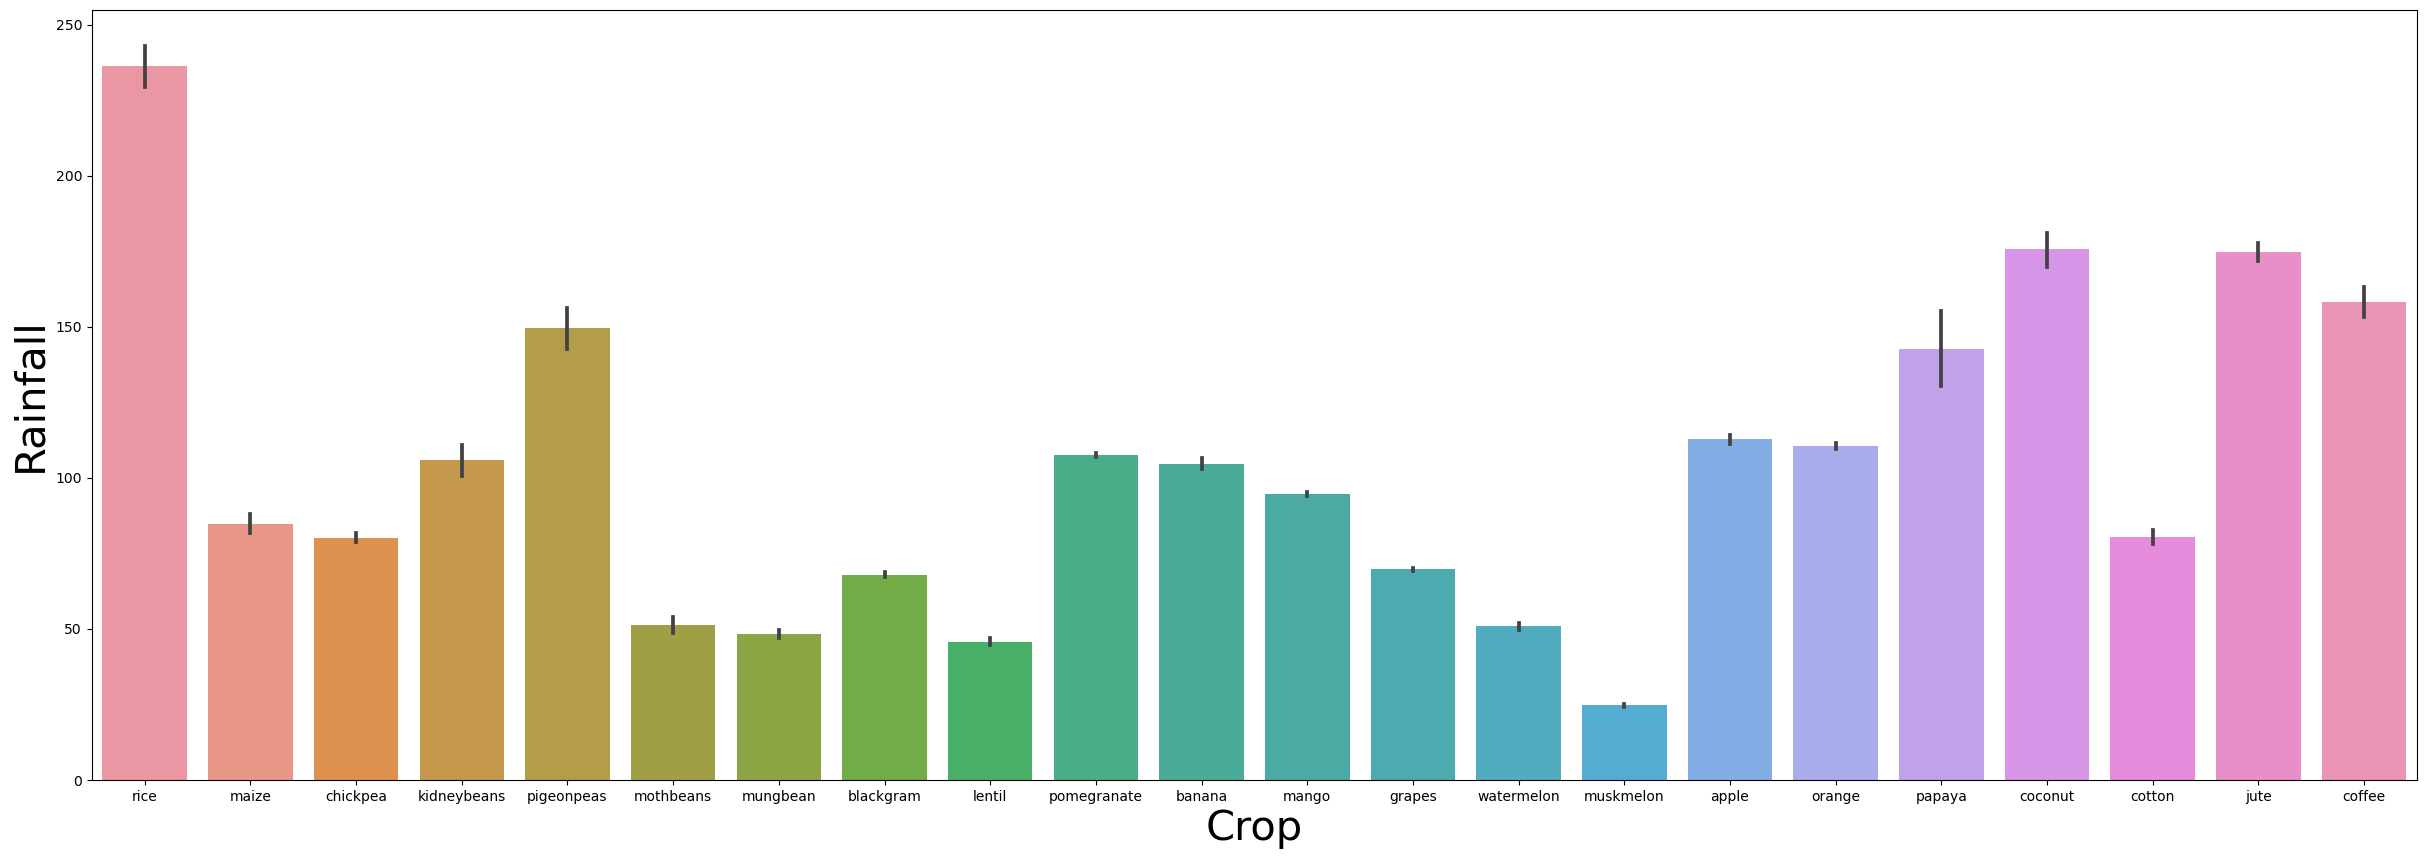

In [24]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x="label",y="rainfall")
plt.xlabel("Crop",fontsize=30)
plt.ylabel("Rainfall",fontsize=30)
plt.show()

Since our **label** data is in string we need to convert it into a integer value format so has to feed the dataset to out ML model in a way in which it could be able to process it make a predicitve outcome.

We are also making use of the train_test function hich would split the dataset=>(X,y) into 4 different categories => X_train, X_test, y_train, y_test. The test_size argument is set at 0.25 which indicates that 25% of the data would be used for the testing purpose.

In [26]:
le = preprocessing.LabelEncoder()
X = df.iloc[:, 0:7]
y = df['label']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y

array([20, 20, 20, ...,  5,  5,  5])

## ML Models

### GaussianNB

Gaussian Naive Bayes (GaussianNB) is a probabilistic classification algorithm. It makes the assumption that the features in the data are independent of one another and is based on the Bayes theorem of conditional probability. 

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [37]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)*100

99.45454545454545

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn.tree as tree
clf = DecisionTreeClassifier(max_depth=10)

In [67]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)*100

98.72727272727273

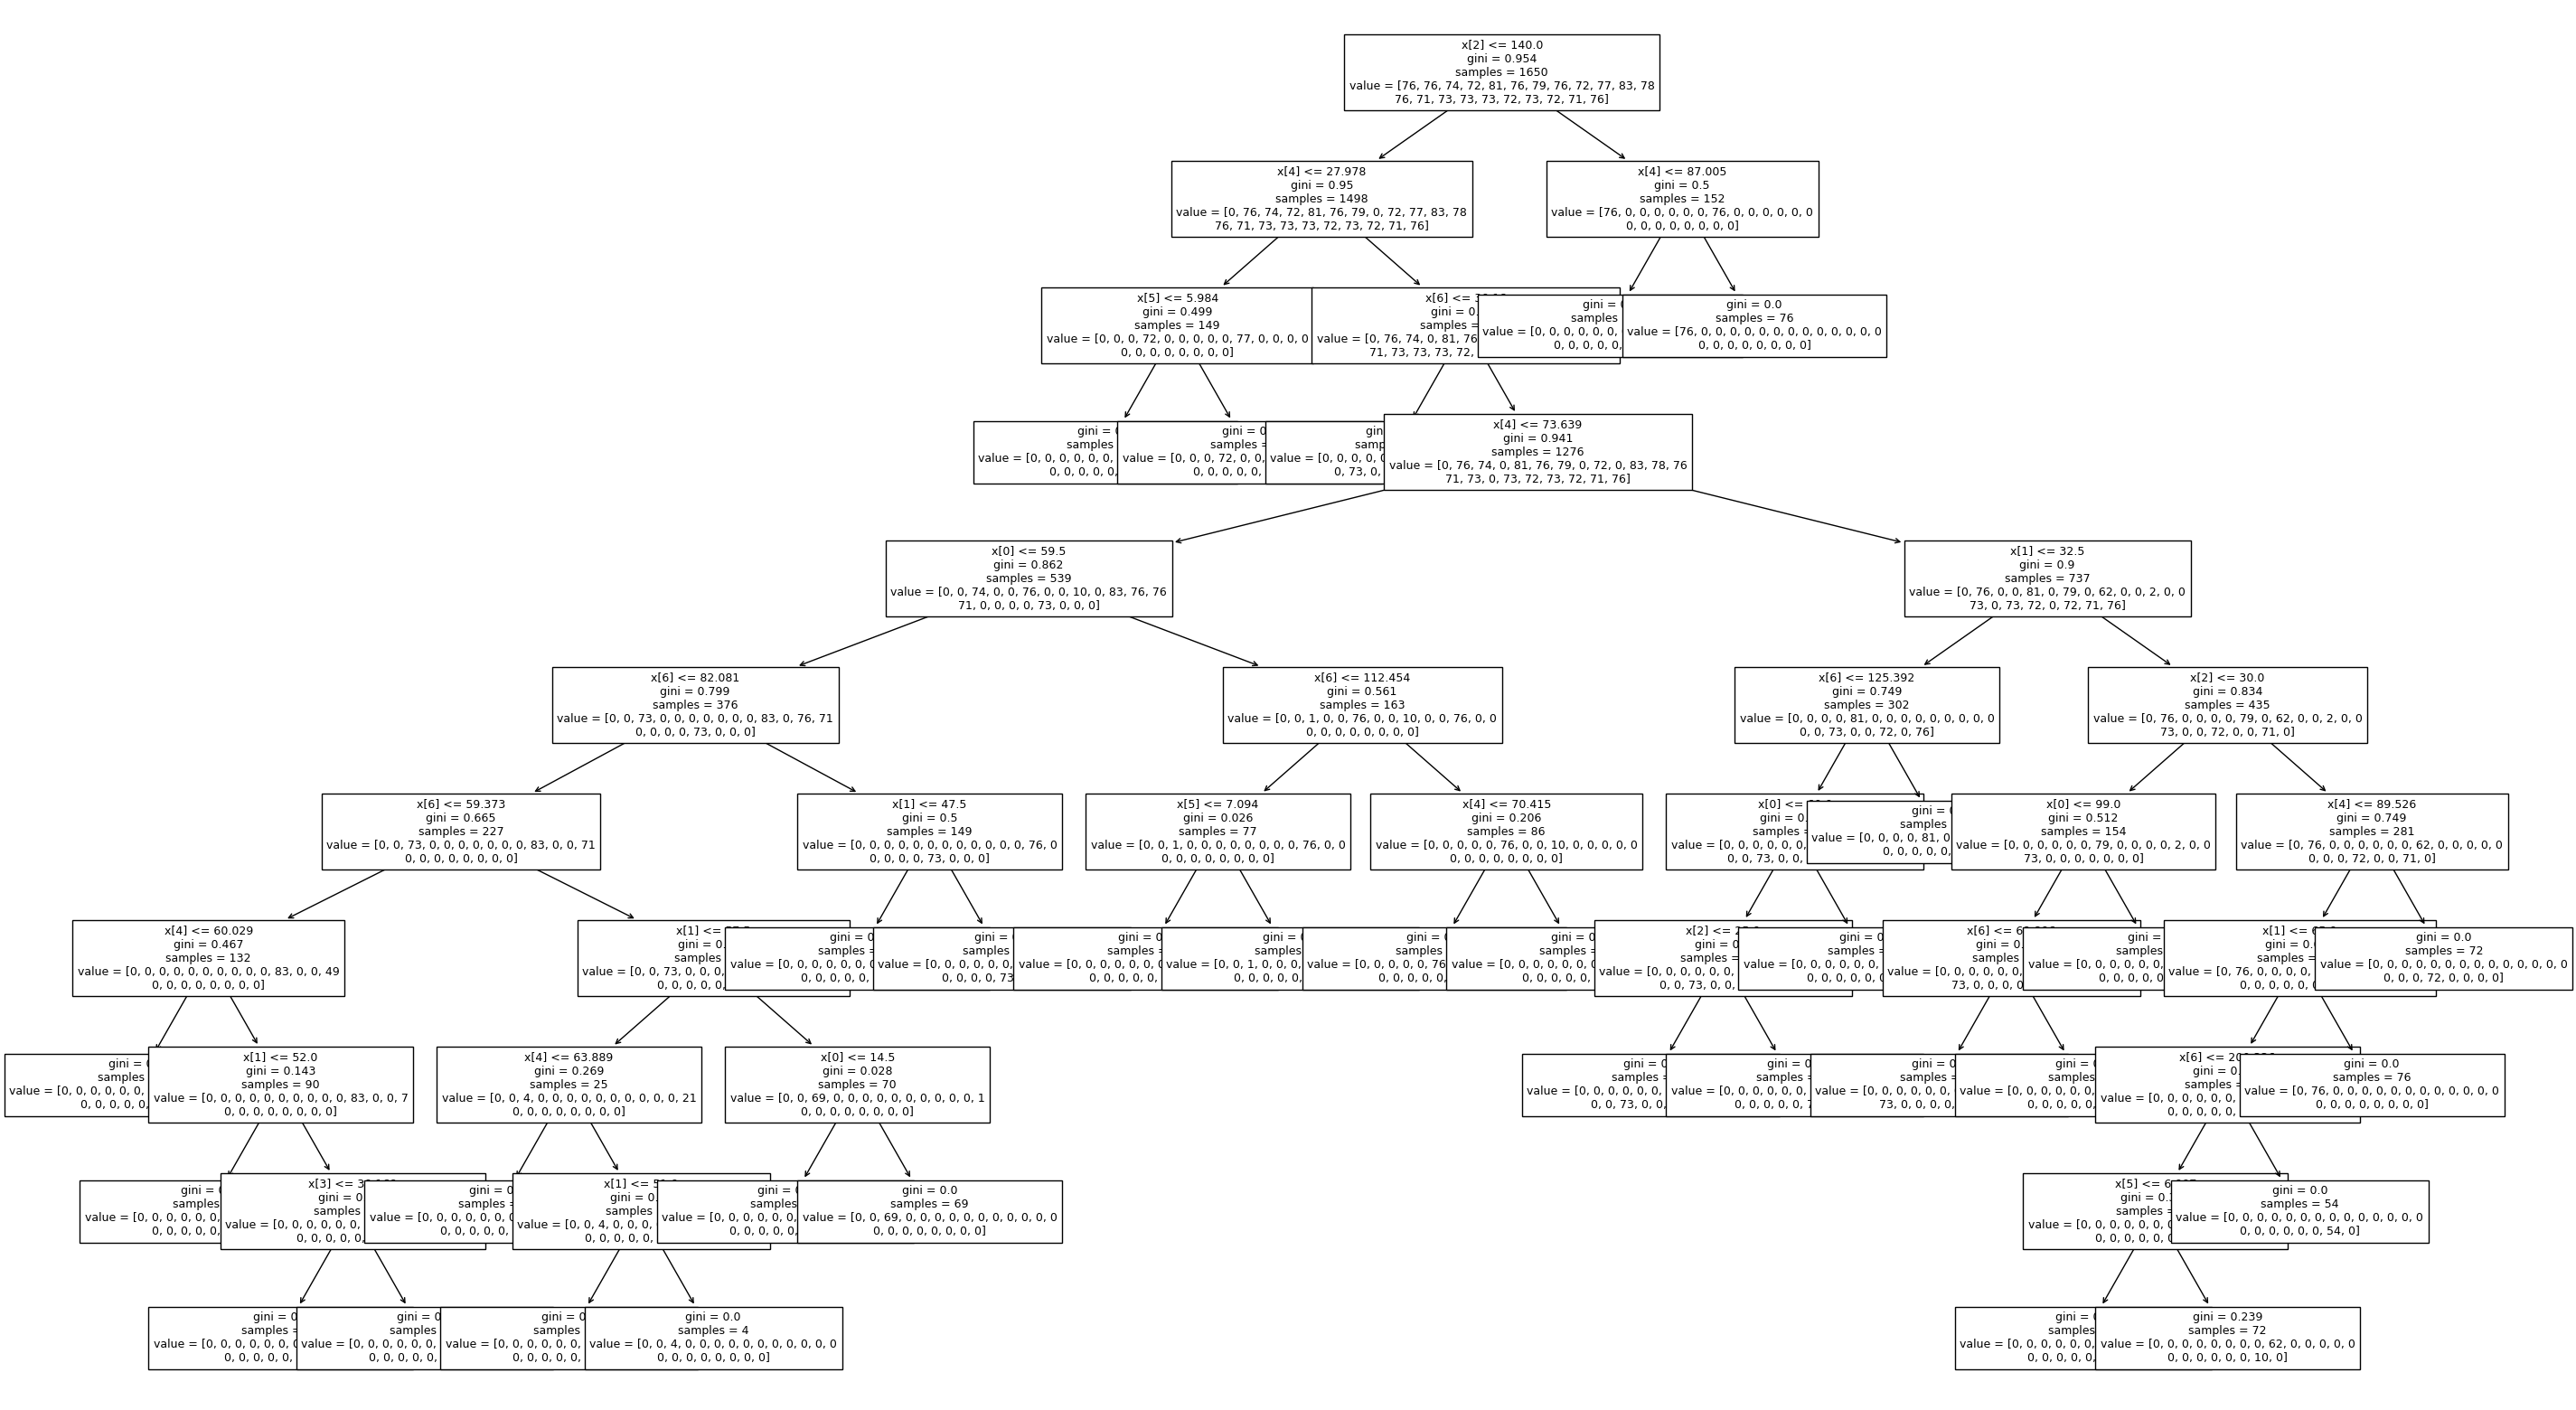

In [77]:
fig, ax = plt.subplots(figsize=(35, 20))
tree.plot_tree(clf,ax=ax,fontsize=9)
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier


In [78]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98363636, 0.97454545, 0.97818182, 0.97636364, 0.97818182,
       0.97272727, 0.97818182, 0.97454545, 0.97818182])

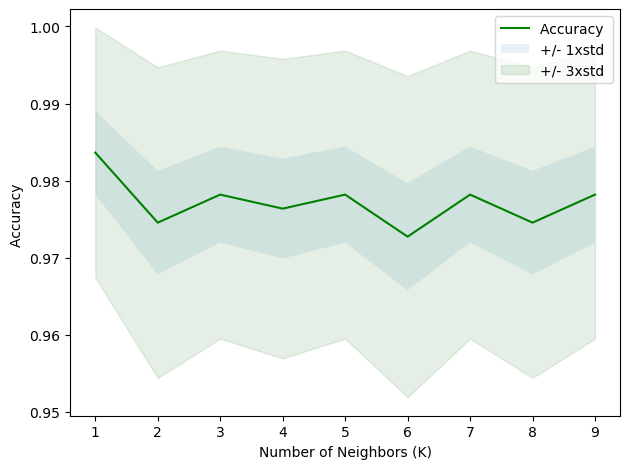

In [86]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="darkgreen")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [80]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9836363636363636 with k= 1


In [84]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)*100

98.36363636363636

Since GaussianNb has given the highest accuracy we will use it to deploy our model.

In [104]:
def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))

Training Accuracy Score: 99.5%
Validation Accuracy Score: 99.5%


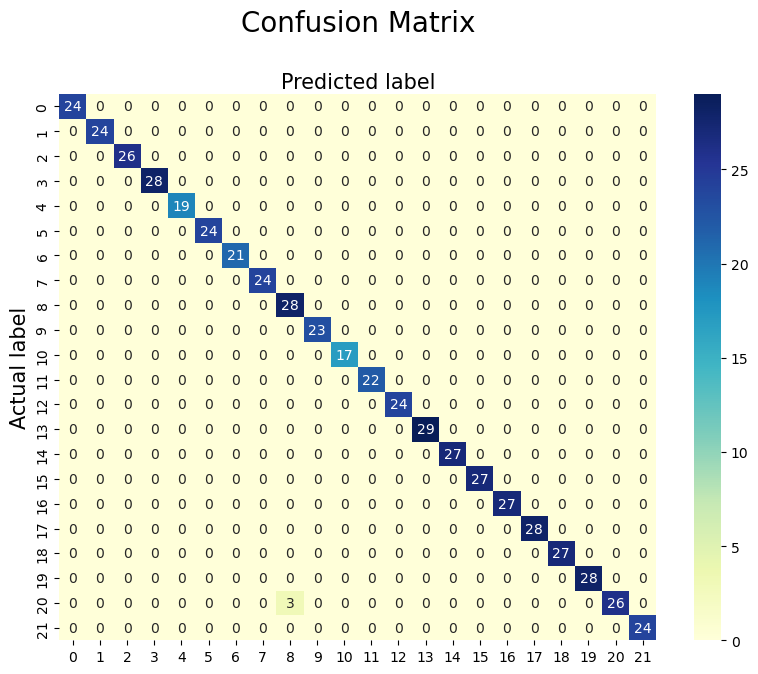

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        27
          17       1.00    

In [107]:
from sklearn.pipeline import Pipeline, make_pipeline
pipeline = make_pipeline(StandardScaler(),  GaussianNB())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)

In [111]:
pickle.dump(model, open('crop_modelNB.pkl', 'wb'))